In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.style.use('seaborn')

In [3]:
def drawImg(image,title="Images"):
    img = cv2.imread(image)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100))
    imagePlot(img,title)
    return img
def imagePlot(img,title="Images"):
    plt.imshow(img,cmap="gray")
    plt.axis('off')
    plt.title(title+str(img.shape))
    plt.show()

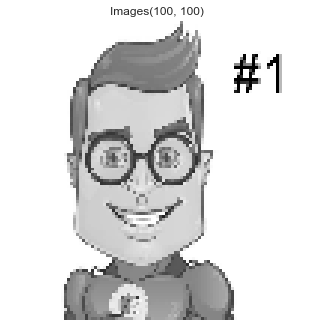

In [4]:
img = drawImg("cody2.jpg")

In [5]:
def convulation(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j] * img_filter[i][j]
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                if new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img

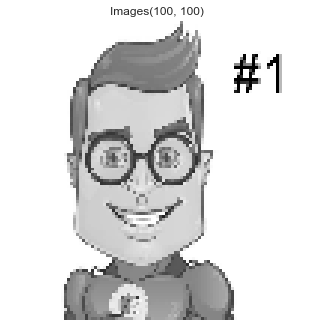

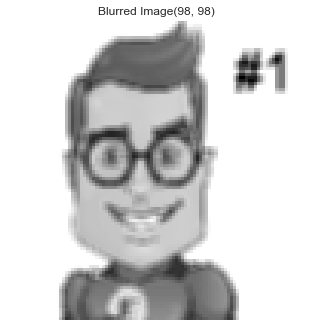

In [6]:
Blur_img_filter = np.ones((3,3))/9.0
output1 = convulation(img,Blur_img_filter)
imagePlot(img)
imagePlot(output1,"Blurred Image")

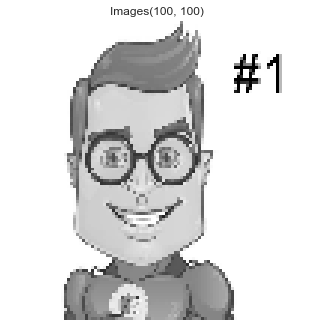

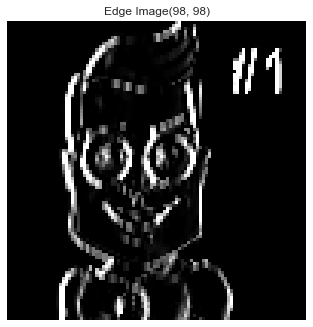

In [7]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output2 = convulation(img,edge_filter)
imagePlot(img)
imagePlot(output2,"Edge Image")

# Extracting Features of image using Filters¶
### Convolution Layer
* contains various filters
* each filter extracts different kinds of features and gives 1 activation map
* multiple activation maps are combined by stacking to form output volume
* so CNN layer takes input a volume and produces an output volume of different shape

# Buzzwords in CNN's
* Convolution Layer
* Valid vs Same Convolution
* Padding
* Stride
* Filters/Kernels
* Pooling (Average/Maxpooling)

# Stride
* Filters can have different size as well as movement
* Stride defines how a filter should move across the image
* No of pixels we skip each time is called stride
* In our example we used a stride of (1,1) along W and H
* You can also use a stride of (2,2) in that case the output volume will have less W and H

### Input and Output Sizes: (assuming 0 padding)$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

# Padding

* Convolution operation we have seen reduces "H" and "W" of original image
* But sometimes we want the output image to have same size as input image
* So we can achieve this by adding 0 value pixels(neurons) outside the original image
* This is called Padding

## Input and Output Sizes after Convolution: (with padding)

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

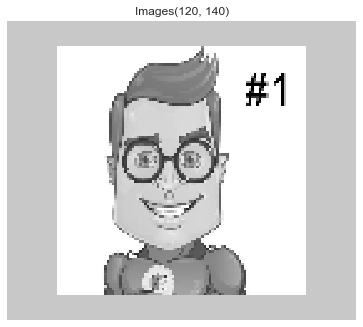

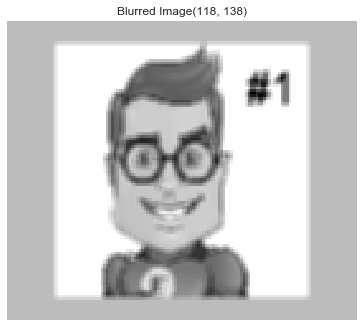

In [8]:
Blur_img_filter = np.ones((3,3))/9.0
pad_img = np.pad(img,((10,10),(20,20)),'constant',constant_values=200)
output1 = convulation(pad_img,Blur_img_filter)
imagePlot(pad_img)
imagePlot(output1,"Blurred Image")

# Pooling Layers
* Pooling is performed after Convolution Operation
* Two types of pooling layer - Average Pooling and Max Pooling
* Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.
* Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.
* It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)
* Makes feature detectors more robust
* No parameters for learning, only hyperparameters such as filter size and type of pooling.

# General CNN Architecture

### [Conv Layers--> ReLu--->Pooling] --> FC -->Softmax

In [9]:
X = np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]]) 

In [12]:
def pooling(X,mode="max"):
    stride = 2
    f = 2
    H,W  = X.shape
    HO = int((H - f)/stride) + 1
    WO = int((W - f)/stride) + 1
    
    pooledImage = np.zeros((HO,WO))
    
    for row in range(HO):
        for col in range(WO):
            r_start = row*stride
            c_start = col*stride
            r_end = r_start + f
            c_end = c_start + f
            X_slice = X[r_start:r_end,c_start:c_end]
            
            if mode=="max":
                pooledImage[row][col] = np.max(X_slice)
            else:
                pooledImage[row][col] = np.average(X_slice)
    return pooledImage

In [13]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
